# Current Situation and Visualization of China's Population

## Abstract
In recent years, China's population growth has hit a record low. In this project, I will study the current situation and visualization of China's population by analyzing factors such as per capita disposable income, cost of living, gender ratio.

## References
- [Nationwide Population Data](https://data.stats.gov.cn/english/easyquery.htm?cn=C01)
- [Regional Population Data](https://data.stats.gov.cn/english/easyquery.htm?cn=E0103)

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.models import HoverTool
from bokeh.plotting import figure, show, output_notebook
output_notebook()
from sklearn import linear_model
import plotly.express as px
from matplotlib.animation import FuncAnimation

Loading BokehJS ...

In [177]:
his_population = pd.read_csv("https://raw.githubusercontent.com/yinthan/ECON323-China-Polulation/main/china-population.csv",usecols=['Year','Total_Population'])
p = figure(
    width=500, 
    height=500,
    title="Historical Population of China",
    x_axis_label="Year",
    y_axis_label="Population"
)
line = p.line(his_population['Year'], his_population['Total_Population'], line_color = 'black')
p.add_tools(HoverTool(tooltips="Population: @y", renderers=[line], mode="vline"))
show(p)

birth_data = pd.read_csv("https://raw.githubusercontent.com/yinthan/ECON323-China-Polulation/main/Growth_Rate.csv", usecols=['Year','Birth_Rate'])

death_data = pd.read_csv("https://raw.githubusercontent.com/yinthan/ECON323-China-Polulation/main/Growth_Rate.csv", usecols=['Year','Death_Rate'])

growth_data = pd.read_csv("https://raw.githubusercontent.com/yinthan/ECON323-China-Polulation/main/Growth_Rate.csv", usecols=['Year','Natural_Growth_Rate'])

g = figure(
    width=500, 
    height=500,
    title="Changes in fertility, mortality and natural growth rates",
    x_axis_label="Year",
    y_axis_label="Per Thousand"
)

line1 = g.line(birth_data['Year'], birth_data['Birth_Rate'], line_color = 'blue')
line2 = g.line(death_data['Year'], death_data['Death_Rate'], line_color = 'red')
line3 = g.line(growth_data['Year'], growth_data['Natural_Growth_Rate'], line_color = 'green')

g.add_tools(HoverTool(tooltips="Birth rate: @y", renderers=[line1], mode="vline"))
g.add_tools(HoverTool(tooltips="Death rate: @y", renderers=[line2], mode="vline"))
g.add_tools(HoverTool(tooltips="Natural growth rate: @y", renderers=[line3], mode="vline"))
show(g)

Combined with population history curve and fertility, mortality and natural growth rate variation, it is known that: Since the founding of New China, except for the famine in the early 1960s, the death rate has continued to decline and stabilized at about 7‰ in the 1980s, while the population has continued to grow and there were two baby booms in the 1960s and 1980s. But in recent years, population growth has slowed, and despite a brief rebound (tiny baby boom) after the only child policy was gradually relaxed and then scrapped in 2010s, it is now slowing sharply again. The fertility rate is already below 10‰ and the natural growth rate is fast approaching zero. It can be predicted that China's population will peak and enter negative growth in the near future.

[Text(0.5, 1.0, 'Birth Rate by Provinces (2019)'),
 Text(0.5, 0, 'Province'),
 Text(0, 0.5, 'Birth Rate per thousand people')]

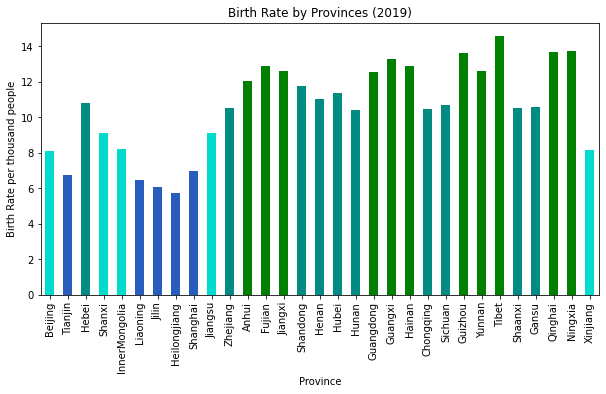

In [179]:

data = pd.read_csv("https://raw.githubusercontent.com/yinthan/ECON323-China-Polulation/main/regional.csv",usecols=['Region','Birth_Rate', 'Nationwide'])
data = data.set_index(["Region"])

def name(x):
    return "".join(filter(str.isalpha, x))

def BarColor1(x):
    x = int(x)
    if x > 40000:
        return 'green'
    elif x > 30000:
        return '#008C83'
    elif x > 20000:
        return '#00DBCD'
    else:
        return '#285CBD'
    
    
def BarColor2(x):
    x = int(x)
    if x > 11:
        return 'green'
    elif x > 9:
        return '#008C83'
    elif x > 7:
        return '#00DBCD'
    else:
        return '#285CBD'
    
data.index = data.index.map(lambda x: name(x))


ax = data['Birth_Rate'].plot.bar(legend=None, figsize=(10,5), color=data['Birth_Rate'].map(lambda x: BarColor2(x)))

ax.set(
    title="Birth Rate by Provinces (2019)",
    xlabel="Province",
    ylabel="Birth Rate per thousand people"
)

[Text(0.5, 1.0, 'Per Capita Disposable Income by Provinces (2019)'),
 Text(0.5, 0, 'Province'),
 Text(0, 0.5, 'Yuan')]

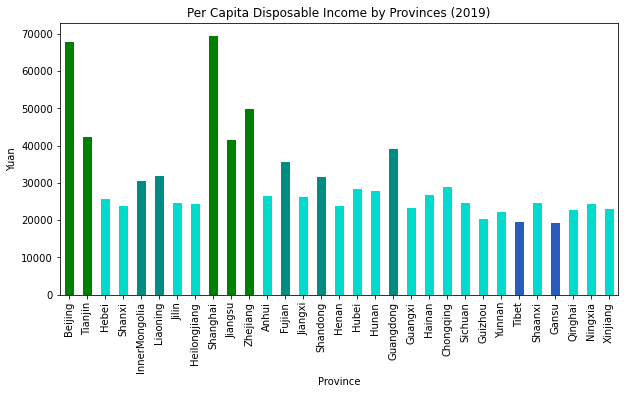

In [180]:
ap = data['Nationwide'].plot.bar(legend=None, figsize=(10,5), color=data['Nationwide'].map(lambda x: BarColor1(x)))
ap.set(
    title="Per Capita Disposable Income by Provinces (2019)",
    xlabel="Province",
    ylabel="Yuan"
)

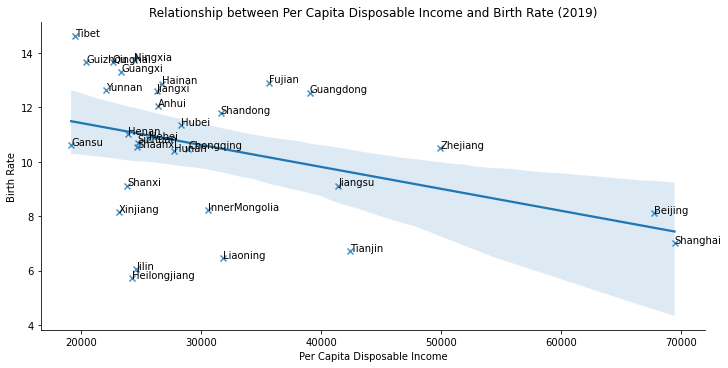

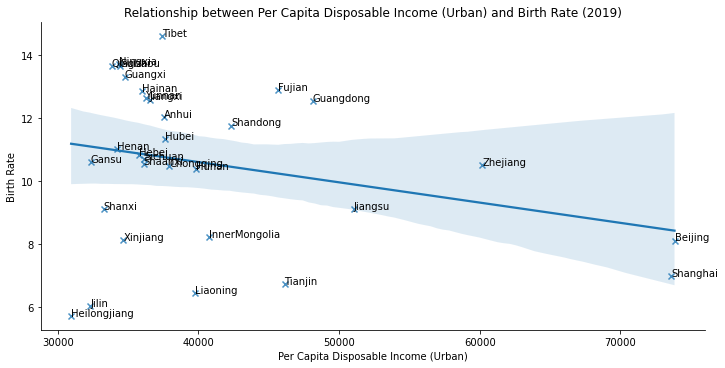

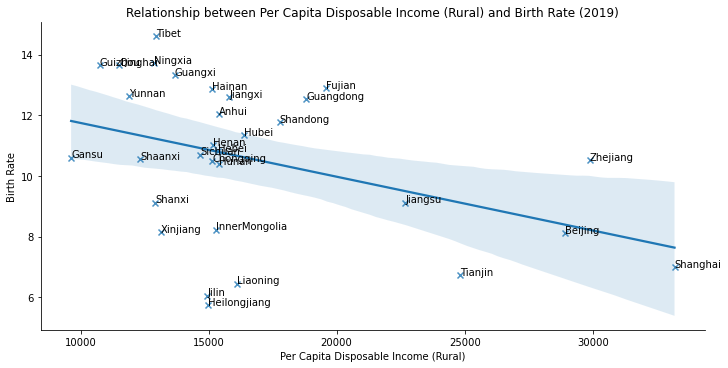

In [191]:
ax = sns.lmplot(x="Nationwide", y="Birth_Rate", markers="x", height=5, aspect=2, data=data)
data['Region'] = data.index
ax.set(
    title="Relationship between Per Capita Disposable Income and Birth Rate (2019)",
    xlabel="Per Capita Disposable Income",
    ylabel="Birth Rate"
)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
        
label_point(data.Nationwide, data.Birth_Rate, data.Region, plt.gca())  

nrud = pd.read_csv("https://raw.githubusercontent.com/yinthan/ECON323-China-Polulation/main/regional.csv",usecols=['Region','Birth_Rate', 'Urban', 'Rural'])
nrud = nrud.set_index(["Region"])
nrud.index = nrud.index.map(lambda x: name(x))
ag = sns.lmplot(x="Urban", y="Birth_Rate", markers="x", height=5, aspect=2, data=nrud)
nrud['Region'] = nrud.index
ag.set(
    title="Relationship between Per Capita Disposable Income (Urban) and Birth Rate (2019)",
    xlabel="Per Capita Disposable Income (Urban)",
    ylabel="Birth Rate"
)
        
label_point(nrud.Urban, nrud.Birth_Rate, nrud.Region, plt.gca())  

ag = sns.lmplot(x="Rural", y="Birth_Rate", markers="x", height=5, aspect=2, data=nrud)
ag.set(
    title="Relationship between Per Capita Disposable Income (Rural) and Birth Rate (2019)",
    xlabel="Per Capita Disposable Income (Rural)",
    ylabel="Birth Rate"
)
        
label_point(nrud.Rural, nrud.Birth_Rate, nrud.Region, plt.gca())  

By comparing the birth rate and per capita income across provinces and cities, combined with the scatter plot and the best fit line, we can find that the higher the income (in developed regions), the lower the birth rate. At the same time, this rule applies in both urban and rural areas. However, we can also see that the northeastern cities (cold) have lower fertility rates compared to the best fit line, while many non-high-income southern and coastal areas have higher fertility rates compared to the best fit line. It can be seen that climate livable area affects fertility rate to a certain extent. But why do regions with higher incomes have lower fertility rates? Let's compare that with consumption.

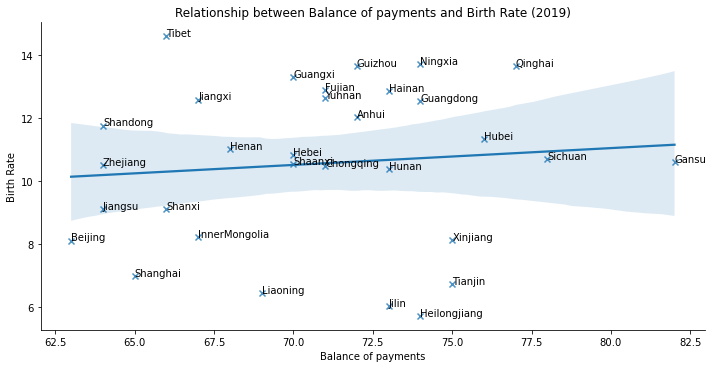

In [192]:
cd1 = pd.read_csv("https://raw.githubusercontent.com/yinthan/ECON323-China-Polulation/main/consumption.csv",usecols=['Region','Birth_Rate', 'Nationwide'])
cd2 = pd.read_csv("https://raw.githubusercontent.com/yinthan/ECON323-China-Polulation/main/consumption.csv",usecols=['Region','Birth_Rate', 'Urban', 'Rural'])
cd1 = cd1.set_index(["Region"])
data = data.drop(columns = ['Region'])
pd.set_option('mode.chained_assignment', None)
cd = cd1.copy()
cd = cd.rename(columns={"Nationwide": "Surplus"})
for i in range(0, 31):
    cd["Surplus"][i] = cd1["Nationwide"][i] / data["Nationwide"][i] * 100


cd.index = cd.index.map(lambda x: name(x))
ax = sns.lmplot(x="Surplus", y="Birth_Rate", markers="x", height=5, aspect=2, data=cd)
cd['Region'] = cd.index
ax.set(
    title="Relationship between Balance of payments and Birth Rate (2019)",
    xlabel="Balance of payments",
    ylabel="Birth Rate"
)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
        
label_point(cd.Surplus, cd.Birth_Rate, cd.Region, plt.gca())  


After comparing expenditure over income, we find that, in addition to geographical livability, areas with a higher share of spending, that is, relatively less developed areas, have higher fertility rates. This is because individual output is relatively low, so households need more people to support them. Areas with higher fertility rates also tend to have relatively low child-rearing costs. But the relationship is relatively loose and not a very important factor in fertility.

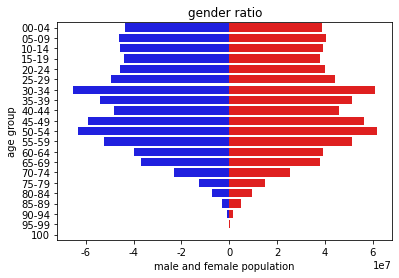

,Age,Male,Female,Ratio
0,00-04,-43618041,38827503,112.338
1,05-09,-46249680,40523550,114.130
2,10-14,-45656257,39240131,116.351
3,15-19,-44115993,38125137,115.714
4,20-24,-45622406,40171890,113.568
5,25-29,-49284391,44149016,111.632
6,30-34,-65521745,61146147,107.156
7,35-39,-54235468,51425143,105.465
8,40-44,-48147343,45900946,104.894
9,45-49,-58956438,56445426,104.449


In [82]:
sr = pd.read_csv("https://raw.githubusercontent.com/yinthan/ECON323-China-Polulation/main/sex%20ratio.csv",usecols=['Age','Male','Female','Ratio'])

sr_data = pd.DataFrame(sr)
sr_data.columns
# print(sr_data)
bar_plot = sns.barplot(y = "Age", x = "Female", color = "red", data = sr_data,)
#                       order = ['100','95-99','90-94','85-89','80-84',
#                                '70-74','75-79','65-69','60-64','55-59',
#                                '50-54','45-49','40-44','35-39','30-34',
#                                '25-29','20-24','15-19','10-14','5-9','0-4'])
bar_plot = sns.barplot(y = "Age", x = "Male", color = "blue", data = sr_data,)
#                       order = ['100','95-99','90-94','85-89','80-84',
#                                '70-74','75-79','65-69','60-64','55-59',
#                                '50-54','45-49','40-44','35-39','30-34',
#                                '25-29','20-24','15-19','10-14','5-9','0-4']
# sns is seaborn alias
bar_plot.set(xlabel="male and female population", ylabel="age group", title = "gender ratio")
plt.show()
display(sr)

(95.0, 115.0)

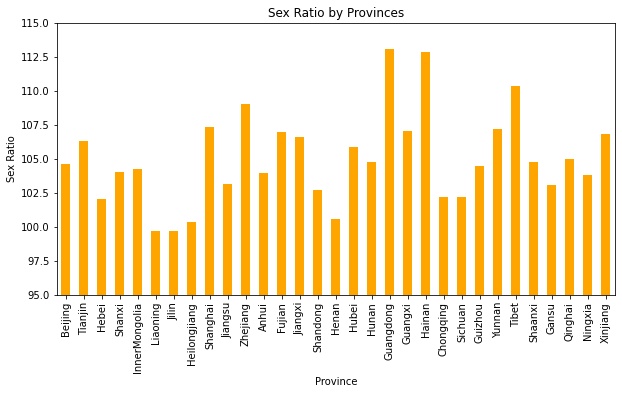

In [160]:
rsr = pd.read_csv("https://raw.githubusercontent.com/yinthan/ECON323-China-Polulation/main/province.csv",usecols=['Region','sex_ratio','Birth_Rate','Nationwide'])
rsr = rsr.set_index(["Region"])
rsr.index = rsr.index.map(lambda x: name(x))
ap = rsr['sex_ratio'].plot.bar(legend=None, figsize=(10,5), color='orange')
ap.set(
    
    title="Sex Ratio by Provinces",
    xlabel="Province",
    ylabel="Sex Ratio"
)
ap.set_ylim(95,115)

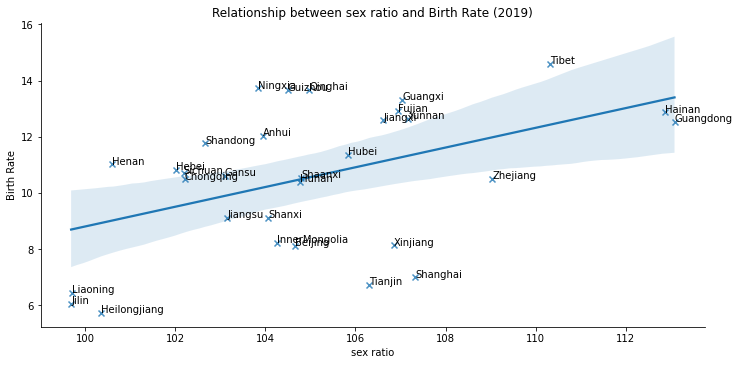

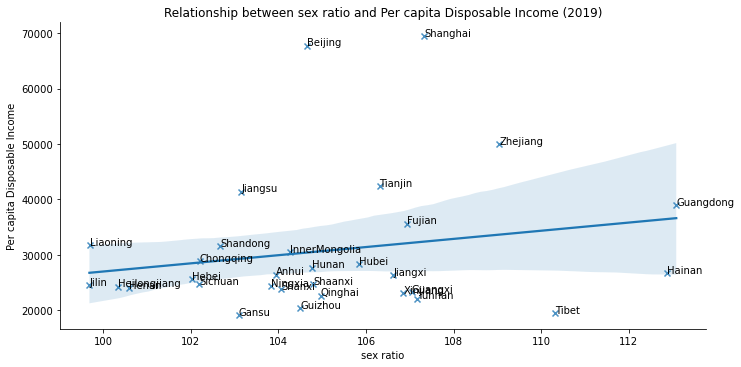

In [161]:
ag = sns.lmplot(x="sex_ratio", y="Birth_Rate", markers="x", height=5, aspect=2, data=rsr)
rsr['Region'] = rsr.index
ag.set(
    title="Relationship between sex ratio and Birth Rate (2019)",
    xlabel="Sex Ratio",
    ylabel="Birth Rate"
)
label_point(rsr.sex_ratio, rsr.Birth_Rate, rsr.Region, plt.gca())

ap = sns.lmplot(x="sex_ratio", y="Nationwide", markers="x", height=5, aspect=2, data=rsr)
rsr['Region'] = rsr.index
ap.set(
    title="Relationship between sex ratio and Per capita Disposable Income (2019)",
    xlabel="Sex Ratio",
    ylabel="Per capita Disposable Income"
)
label_point(rsr.sex_ratio, rsr.Nationwide, rsr.Region, plt.gca())

Another serious demographic problem in China is the imbalance between males and females. As can be seen from the bar chart above, the provincial sex ratio and fertility rate fitting data, places with more bigger sex ratio rate (more males than females) have higher fertility rates. This is probably due to the traditional preference for boys in these areas the only child policy. Because of the preference for sons, families continue to have children until they have a boy, which increases the fertility rate. But when the baby is a boy, families stop having children, thus exacerbating the imbalance. At the same time, the sex ratio is related to the level of economic development. With the exception of Beijing and Shanghai, places with more average sex ratios, which are linked to lower birth rates, have lower incomes.

In [ ]:
rr = pd.read_csv("https://raw.githubusercontent.com/yinthan/ECON323-China-Polulation/main/r2.csv",usecols=['Region','Birth_Rate','Housing_Price'])
ag = sns.lmplot(x="Housing_Price", y="Birth_Rate", markers="x", height=5, aspect=2, data=rr)
rr['Region'] = rsr.index
ag.set(
    title="Relationship between Housing Price and Birth Rate (2019)",
    xlabel="Housing Price",
    ylabel="Birth Rate"
)
label_point(rr.Housing_Price, rr.Birth_Rate, rr.Region, plt.gca())

As well as economic development, housing prices constrain fertility, and high housing prices suppress fertility growth.

       Region  Years  Population
0     Beijing   2000        1364
1     Beijing   2001        1385
2     Beijing   2002        1423
3     Beijing   2003        1456
4     Beijing   2004        1493
..        ...    ...         ...
646  Xinjiang   2016        2428
647  Xinjiang   2017        2480
648  Xinjiang   2018        2520
649  Xinjiang   2019        2559
650  Xinjiang   2020        2590

[651 rows x 3 columns]


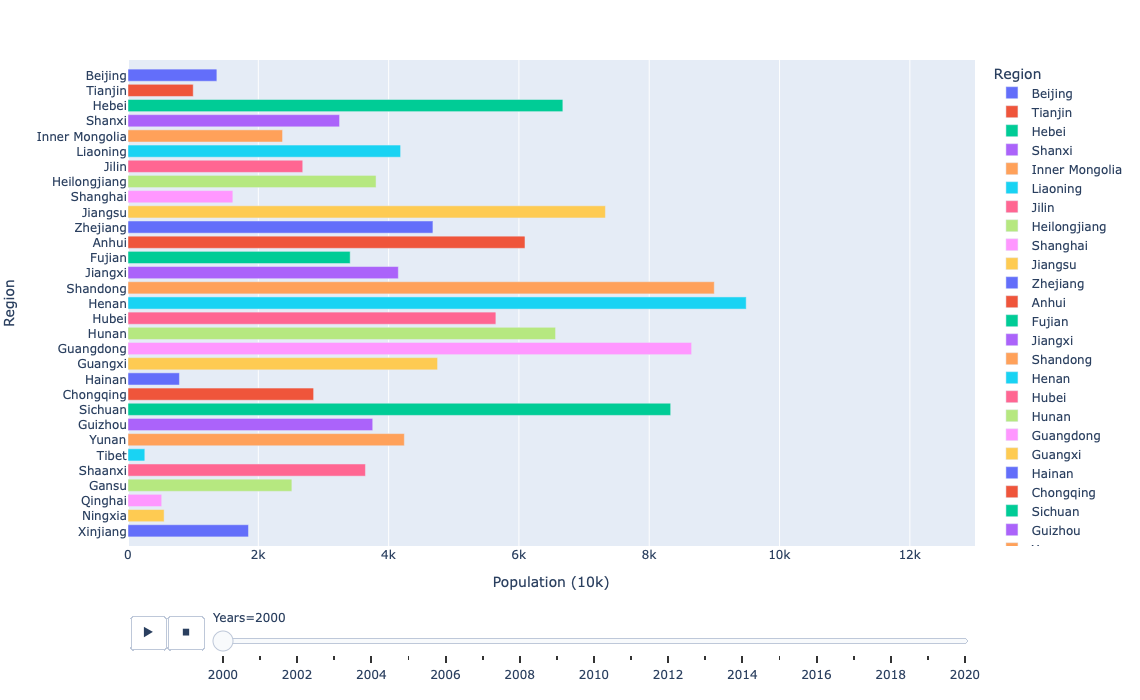

In [216]:
rr = pd.read_csv("https://raw.githubusercontent.com/yinthan/ECON323-China-Polulation/main/ldata.csv")
print(rr)
fig = px.bar(rr, y="Region", x="Population", color="Region", orientation='h', height=700,
  animation_frame="Years", animation_group="Region", range_y=[-1,31], range_x=[0,13000], 
             labels=dict(Population="Population (10 thousand)"))

fig.show()

Finally, this dynamic chart shows the population by provinces in China during the past 2 decades.